# SARS-CoV-2 Pandemic Analysis

> Import R libraries

In [253]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(scales)

> Importing data from [JHU CSSE](https://systems.jhu.edu/)

In [89]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
filename = "time_series_covid19_confirmed_global.csv"

if (!file.exists(filename)) {
    download.file(paste(url,filename,sep=""), filename, method="auto")
}

data = read.csv(filename)

> First look at the data

In [90]:
head(data)
tail(data)

,Province.State,Country.Region,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,⋯,X11.12.22,X11.13.22,X11.14.22,X11.15.22,X11.16.22,X11.17.22,X11.18.22,X11.19.22,X11.20.22,X11.21.22
,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,⋯,204417,204510,204610,204724,204820,204982,205009,205039,205146,205229
2,,Albania,41.15330,20.16830,0,0,0,0,0,0,⋯,333138,333156,333161,333197,333215,333233,333233,333246,333256,333257
3,,Algeria,28.03390,1.65960,0,0,0,0,0,0,⋯,270929,270939,270952,270969,270981,270996,270996,271011,271023,271028
4,,Andorra,42.50630,1.52180,0,0,0,0,0,0,⋯,46664,46664,46664,46664,46824,46824,46824,46824,46824,46824
5,,Angola,-11.20270,17.87390,0,0,0,0,0,0,⋯,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
6,,Antarctica,-71.94990,23.34700,0,0,0,0,0,0,⋯,11,11,11,11,11,11,11,11,11,11


,Province.State,Country.Region,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,⋯,X11.12.22,X11.13.22,X11.14.22,X11.15.22,X11.16.22,X11.17.22,X11.18.22,X11.19.22,X11.20.22,X11.21.22
,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
284,,Vietnam,14.05832,108.27720,0,2,2,2,2,2,⋯,11508447,11508689,11508893,11509473,11509975,11510484,11510919,11511178,11511452,11511822
285,,West Bank and Gaza,31.95220,35.23320,0,0,0,0,0,0,⋯,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
286,,Winter Olympics 2022,39.90420,116.40740,0,0,0,0,0,0,⋯,535,535,535,535,535,535,535,535,535,535
287,,Yemen,15.55273,48.51639,0,0,0,0,0,0,⋯,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
288,,Zambia,-13.13390,27.84933,0,0,0,0,0,0,⋯,333685,333685,333685,333685,333685,333685,333685,333685,333685,333685
289,,Zimbabwe,-19.01544,29.15486,0,0,0,0,0,0,⋯,257893,257893,257893,257893,257893,257893,257893,257893,257893,257893


## Transforming data

Now, we'll transform the data so we can analyse the growth of cumulative cases through time.

In order to do this, there are some steps:
    1. filter data by country name
    2. filter data by province, if necessary
    3. remove unnecessary columns 
    4. aggregate, if there are multiple rows

> Find country regions and provinces

In [169]:
country = "Netherlands"
province = ""

filtered.data <- data %>% select(1,2)
filtered.data <- filtered.data %>% filter(Country.Region == country)
if (province != "") {
    filtered.data <- filtered.data %>% filter(Province.State == province)    
}

filtered.data

Province.State,Country.Region
<fct>,<fct>
Aruba,Netherlands
"Bonaire, Sint Eustatius and Saba",Netherlands
Curacao,Netherlands
Sint Maarten,Netherlands
,Netherlands


> Find region names from a string sample

In [161]:
sample = 'Korea'
(data %>% select(1,2))[grep(sample, data$Country.Region), ]

,Province.State,Country.Region
,<fct>,<fct>
162,,"Korea, North"
163,,"Korea, South"


### Creating the transformed data frame

In [192]:
timespan = as.Date(colnames(data)[-(0:4)], format="X%m.%d.%y")
region.names <- list(
    'Belgium', 'China', 'Hong Kong', 'France', 'Germany',
    'Iran', 'Italy', 'Japan', 'South Korea', 'Netherlands',
    'Portugal', 'Spain', 'United Kingdom', 'United States'
)

> **collect(data)**: takes filtered data and performs transformation steps 3 and 4

In [369]:
collect = function(data) {
    return(as.numeric(mapply(sum, data %>% select(-1,-2,-3,-4))))
}

In [370]:
df <- data.frame(
    Belgium = collect(data %>% filter(Country.Region=="Belgium")),
    China = collect(data %>% filter(Country.Region=="China" & Province.State!="Hong Kong")),
    HongKong = collect(data %>% filter(Country.Region=="China" & Province.State=="Hong Kong")),
    France = collect(data %>% filter(Country.Region=="France" & Province.State=="")),
    Germany = collect(data %>% filter(Country.Region=="Germany")),
    Iran = collect(data %>% filter(Country.Region=="Iran")),
    Italy = collect(data %>% filter(Country.Region=="Italy")),
    Japan = collect(data %>% filter(Country.Region=="Japan")),
    SouthKorea = collect(data %>% filter(Country.Region=="Korea, South")),
    Netherlands = collect(data %>% filter(Country.Region== 'Netherlands' & Province.State=="")),
    Portugal = collect(data %>% filter(Country.Region=="Portugal")),
    Spain = collect(data %>% filter(Country.Region=="Spain")),
    UnitedKingdom = collect(data %>% filter(Country.Region== 'United Kingdom' & Province.State=="")),
    UnitedStates = collect(data %>% filter(Country.Region=="US")),
    date = timespan
)
    

> Summary of the new transformed data

In [371]:
summary(df)

    Belgium            China            HongKong           France        
 Min.   :      0   Min.   :    548   Min.   :      0   Min.   :       0  
 1st Qu.: 136080   1st Qu.:  90672   1st Qu.:   5138   1st Qu.:  657482  
 Median :1080035   Median : 101382   Median :  11896   Median : 5717831  
 Mean   :1714925   Mean   : 279084   Mean   : 365779   Mean   :11086955  
 3rd Qu.:3605374   3rd Qu.: 128492   3rd Qu.: 720570   3rd Qu.:22490236  
 Max.   :4627186   Max.   :1320448   Max.   :2043967   Max.   :36365135  
    Germany              Iran             Italy              Japan         
 Min.   :       0   Min.   :      0   Min.   :       0   Min.   :       2  
 1st Qu.:  304672   1st Qu.: 481834   1st Qu.:  332102   1st Qu.:   86760  
 Median : 3722782   Median :3117336   Median : 4254294   Median :  787305  
 Mean   : 9342323   Mean   :3667231   Mean   : 7117662   Mean   : 3953196  
 3rd Qu.:15947816   3rd Qu.:7099238   3rd Qu.:13079150   3rd Qu.: 5466426  
 Max.   :36247081   Max.  

### Plotting cummulative cases over time

> We sum 1 to the values in order to avoid errors caused by log10(0)

In [375]:
colors = c("cyan", "black", brewer.pal(name="Paired", n = 12))
options(repr.plot.width = 6, repr.plot.height = 8)

p <- ggplot(data = df, aes(x = timespan)) +
  geom_line(aes(y = 1 + Belgium, colour = "Belgium")) +
  geom_line(aes(y = 1 + China, colour = "China")) +
  geom_line(aes(y = 1 + HongKong, colour = "Hong Kong")) +
  geom_line(aes(y = 1 + France, colour = "France")) +
  geom_line(aes(y = 1 + Germany, colour = "Germany")) +
  geom_line(aes(y = 1 + Iran, colour = "Iran")) +
  geom_line(aes(y = 1 + Italy, colour = "Italy")) +
  geom_line(aes(y = 1 + Japan, colour = "Japan")) +
  geom_line(aes(y = 1 + SouthKorea, colour = "South Korea")) +
  geom_line(aes(y = 1 + Netherlands, colour = "Netherlands")) +
  geom_line(aes(y = 1 + Portugal, colour = "Portugal")) +
  geom_line(aes(y = 1 + Spain, colour = "Spain")) +
  geom_line(aes(y = 1 + UnitedKingdom, colour = "United Kingdom")) +
  geom_line(aes(y = 1 + UnitedStates, colour = "United States")) +
  scale_colour_manual(
      "", 
      breaks = region.names,
      values = colors
  ) +
  xlab(" ") + 
  labs(title="Cumulative cases since 22 Jan 2020 by country") +
  # theme_classic() +
  theme(legend.position = "top")

> Linear Scale Plot

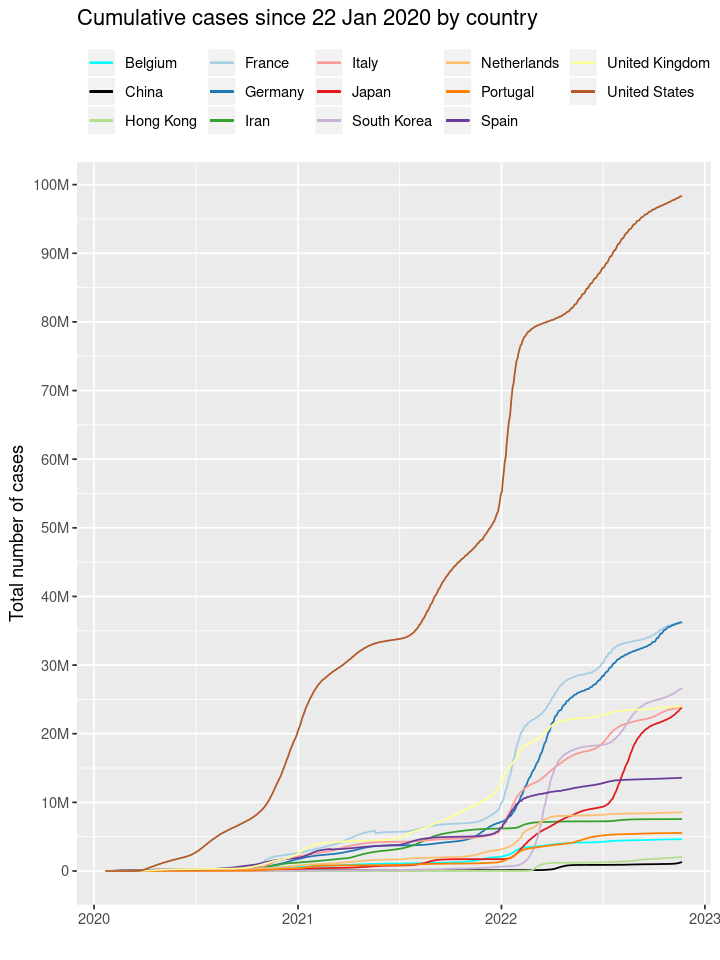

In [410]:
p + scale_y_continuous(
    "Total number of cases",
    labels = scales::label_number_si(),
    breaks = breaks_pretty(n=8)
)

In the graph above, the growth in the United States curve outstands the other countries, even to a point that by the period when lockdown and quarantine peaked (between early 2020 and mid 2021) most curves were basically flattened by the US numbers. Nevertheless, after the loosening of the sanitary constraints in the beggining of 2022 we can see a new outbreak in multiple countries as France, Germany, Italy, the UK, Japan and South Korea.

> Logaritmic Scale Plot

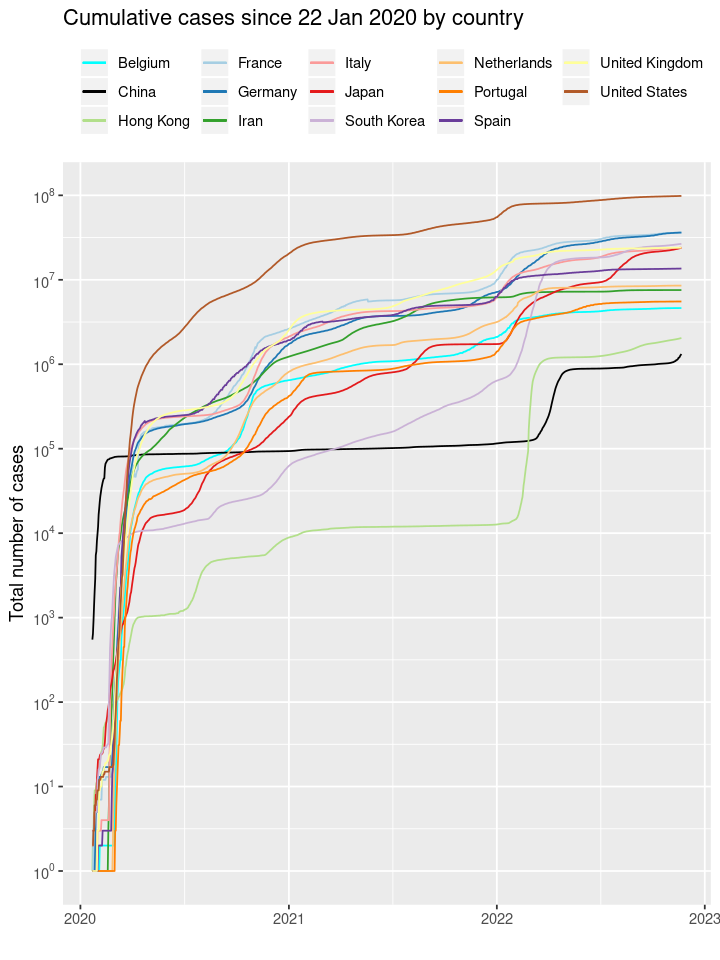

In [400]:
p + scale_y_log10(
    "Total number of cases",
    labels = function(x) {math_format(expr = 10^.x, format = force)(log10(x))},
    breaks = breaks_log(n=7)
)

Using a logarithmic scale allows us to easily see relative growth, instead of absolute growth (e.g., previous graph). Now, it is clear that China had the first important rise in the number of cases, and it was controlled fairly quickly. In the other hand, it took a couple of months for the virus to spread in the rest of the observed countries. Also, most of them couldn't handle the outbreaks as well as China did, as their curves kept growing continuously.